In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12109,-117.29,33.97,4.0,18767.0,3032.0,8805.0,2723.0,4.6667,160600.0,INLAND
15928,-122.42,37.73,35.0,1871.0,342.0,1055.0,310.0,4.6250,279300.0,NEAR BAY
20020,-119.04,36.07,17.0,2623.0,659.0,1912.0,618.0,1.5893,52000.0,INLAND
3039,-119.12,35.37,13.0,4527.0,713.0,2170.0,671.0,4.8266,146200.0,INLAND
5150,-118.27,33.96,34.0,1040.0,276.0,1083.0,255.0,1.6467,90900.0,<1H OCEAN


In [28]:
housing_data = housing_data.dropna()
housing_data.shape

(20433, 10)

In [29]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [30]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)
housing_data.shape

(19475, 10)

In [31]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])
housing_data.shape

(19475, 14)

In [34]:
housing_data.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17195,-119.75,34.45,26.0,3578.0,677.0,1504.0,618.0,4.1375,395000.0,False,False,False,False,True


In [35]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [36]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [38]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [39]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [40]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(x_train,y_train)

In [41]:
print("Training_score : ", linear_model.score(x_train,y_train))

Training_score :  0.6116775742460059


In [42]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [43]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -54901.533245
longitude                     -24703.383408
ocean_proximity_NEAR BAY      -24313.638591
latitude                      -22800.540806
ocean_proximity_<1H OCEAN     -17477.867375
ocean_proximity_NEAR OCEAN    -12518.235824
population                       -28.761824
total_rooms                       -7.380130
households                        40.987277
total_bedrooms                    91.090819
housing_median_age               956.211331
median_income                  38611.789634
ocean_proximity_ISLAND        109211.275035
dtype: float64


In [44]:
y_pred = linear_model.predict(x_test)

In [45]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
15275,200962.741967,122400.0
13853,71341.026339,116700.0
17465,325787.610710,268800.0
16130,235602.885567,375000.0
3803,225894.724341,226500.0
6175,225926.169118,197000.0
2434,78891.716595,62400.0
19554,75995.511530,54100.0
1171,70653.368297,57600.0
10231,278509.600375,182500.0


In [46]:
from sklearn.metrics import r2_score
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6175248206417835


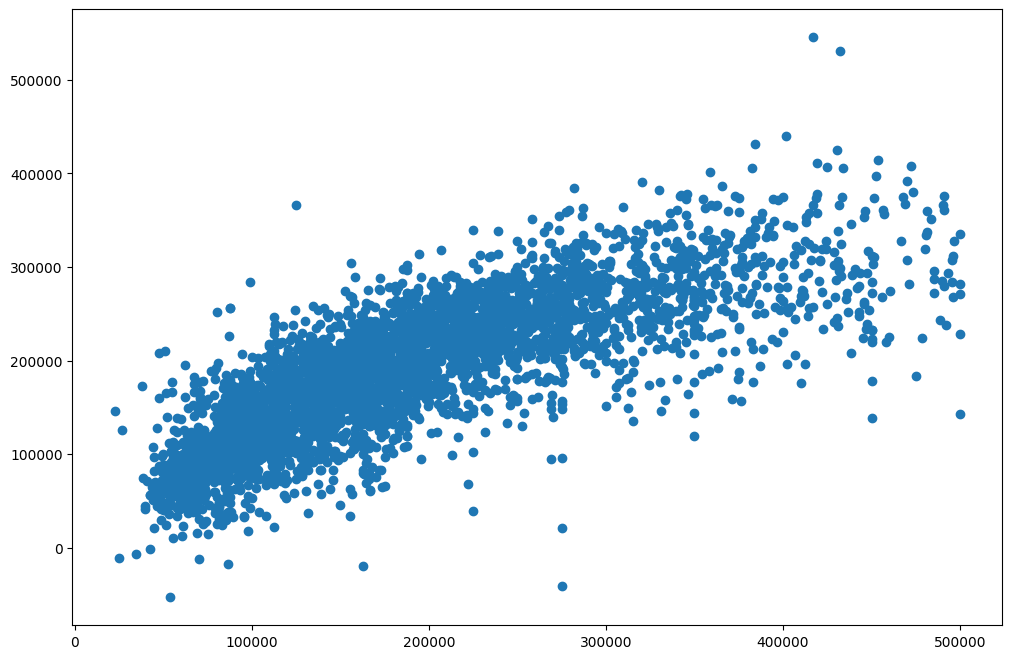

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.show()

In [48]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [49]:
df_pred_actual_sample.head()

,index,predicted,actual
0,689,202640.239834,144900.0
1,4079,256358.185292,366100.0
2,19493,118492.630491,110200.0
3,2294,152051.193973,74300.0
4,14801,190203.624115,144500.0


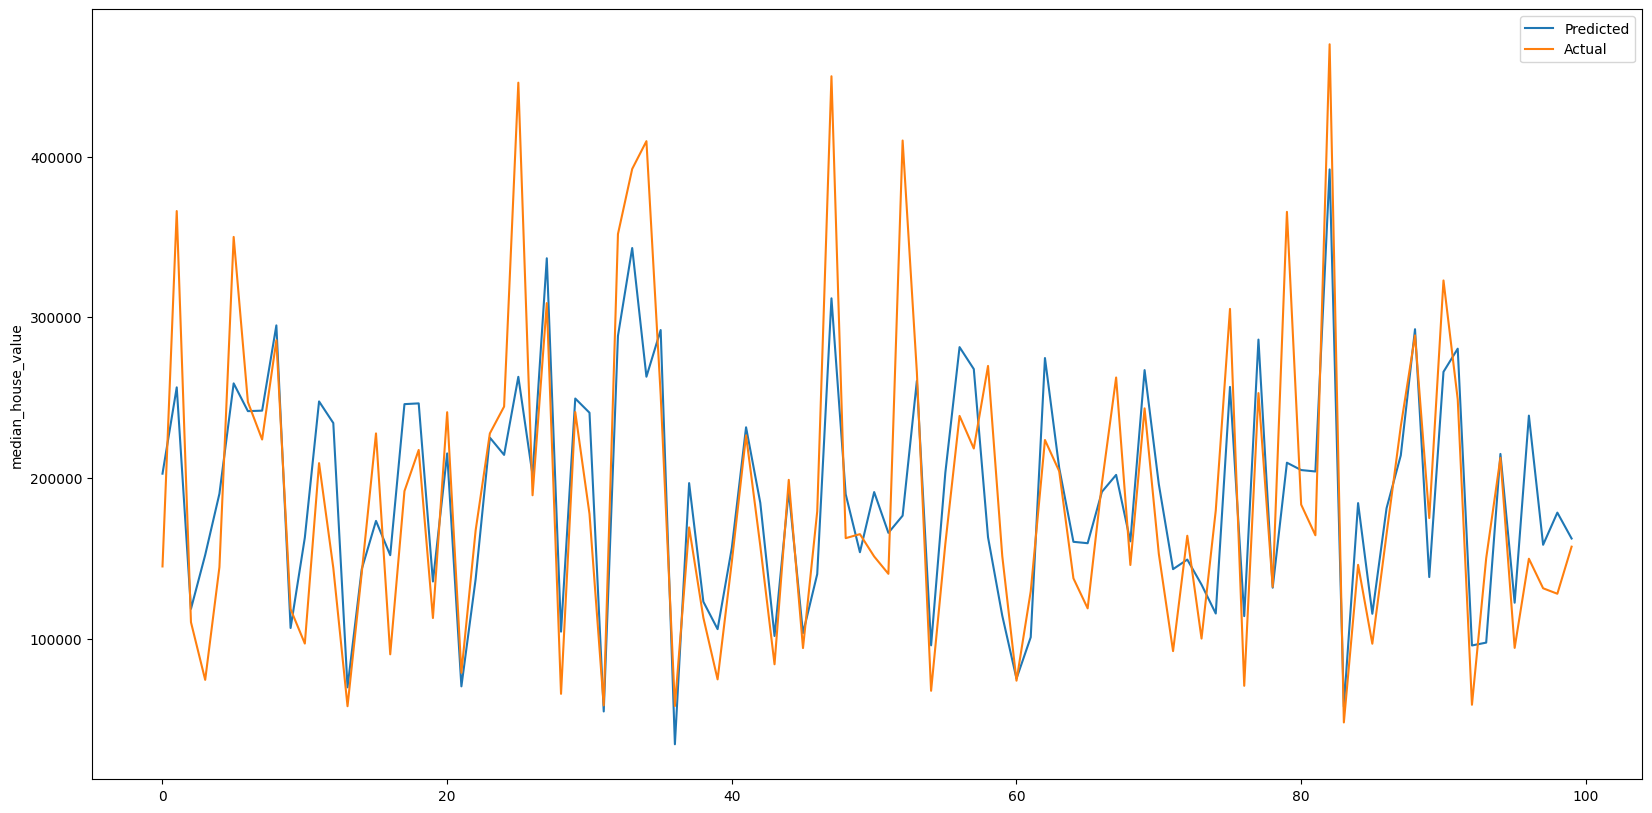

In [50]:
plt.figure(figsize=(20, 10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()